In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
43,425 cases (7 day average) as of Sun 18 Jul, +881.4 since Sat 17 Jul
702 hospitalised (7 day average) as of Wed 21 Jul, +21.0 since Tue 20 Jul
37 died (7 day average) as of Sun 18 Jul, +5.4 since Sat 17 Jul


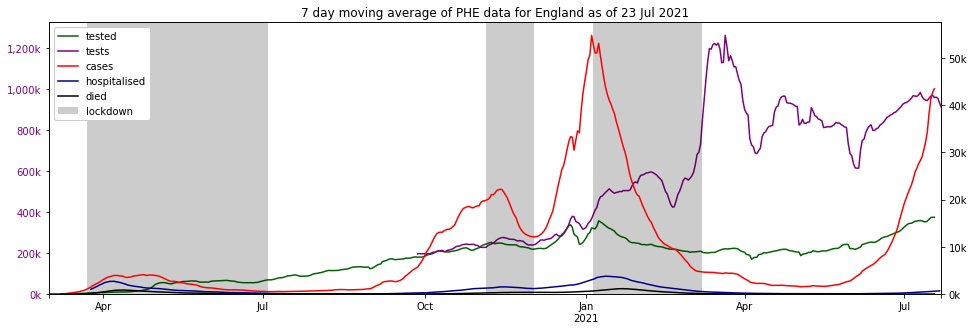

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

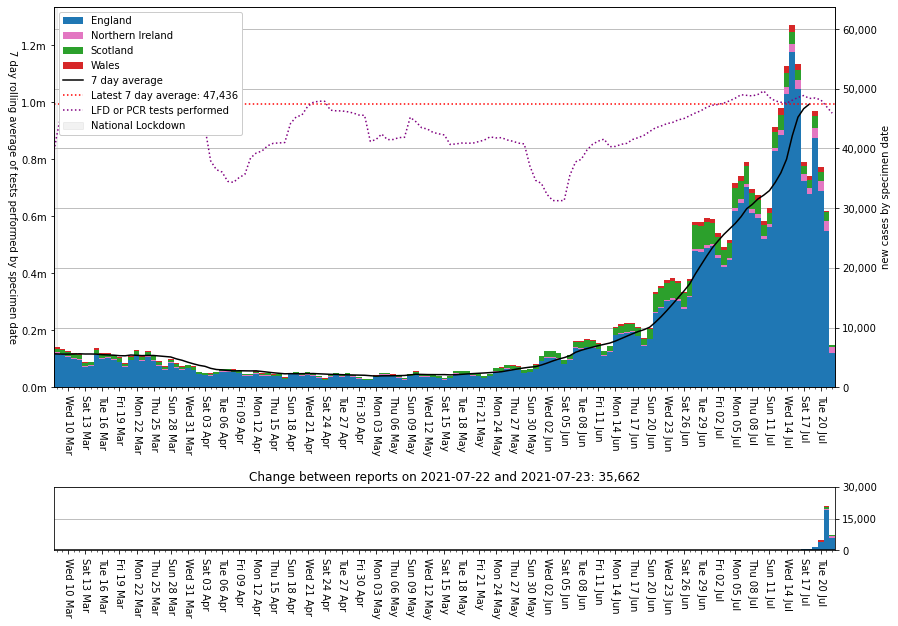

In [4]:
plot_areas(for_date, 'cases_nations', earliest=lockdown3[1], date_format='%a %d %b')

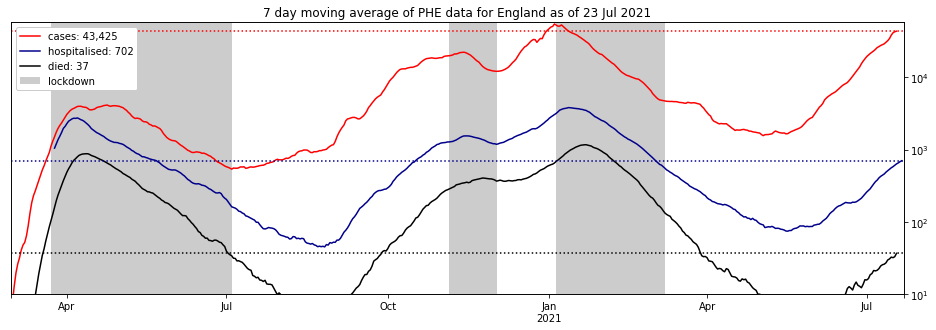

In [5]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

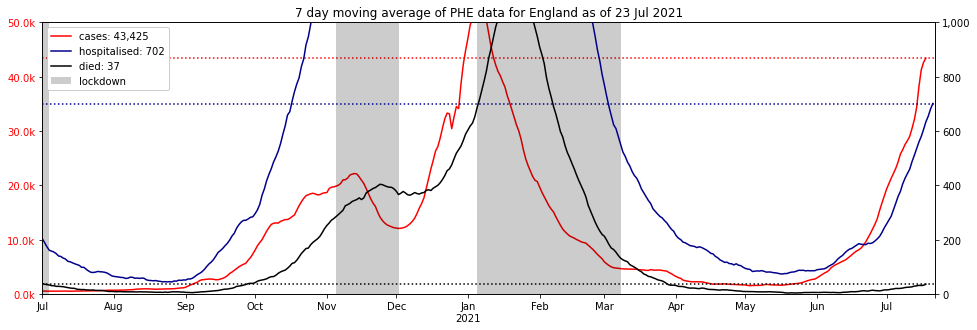

In [6]:
plot_summary(earliest_date='2020-07-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=50_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=1000)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,22 Jul 21,"+30,754,568","+39,007,219","+30,754,568","+156,245","+39,457","+156,245"
Northern Ireland,22 Jul 21,"+1,003,634","+1,192,181","+1,003,634","+1,965","+1,143","+1,965"
Scotland,22 Jul 21,"+3,044,803","+3,992,327","+3,044,803","+16,532","+2,400","+16,532"
Wales,22 Jul 21,"+1,959,641","+2,285,118","+1,959,641",+0,+0,+0


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,30754568.0,39007219.0,8252651.0,56286961,54.638885,14.661746,30.699369
1,Northern Ireland,N92000002,1003634.0,1192181.0,188547.0,1893667,52.999498,9.956714,37.043789
2,Scotland,S92000003,3044803.0,3992327.0,947524.0,5463300,55.731939,17.343437,26.924624
3,Wales,W92000004,1959641.0,2285118.0,325477.0,3152879,62.154019,10.323168,27.522813


'partial: 46,476,845 (69.6%), full: 36,762,646'

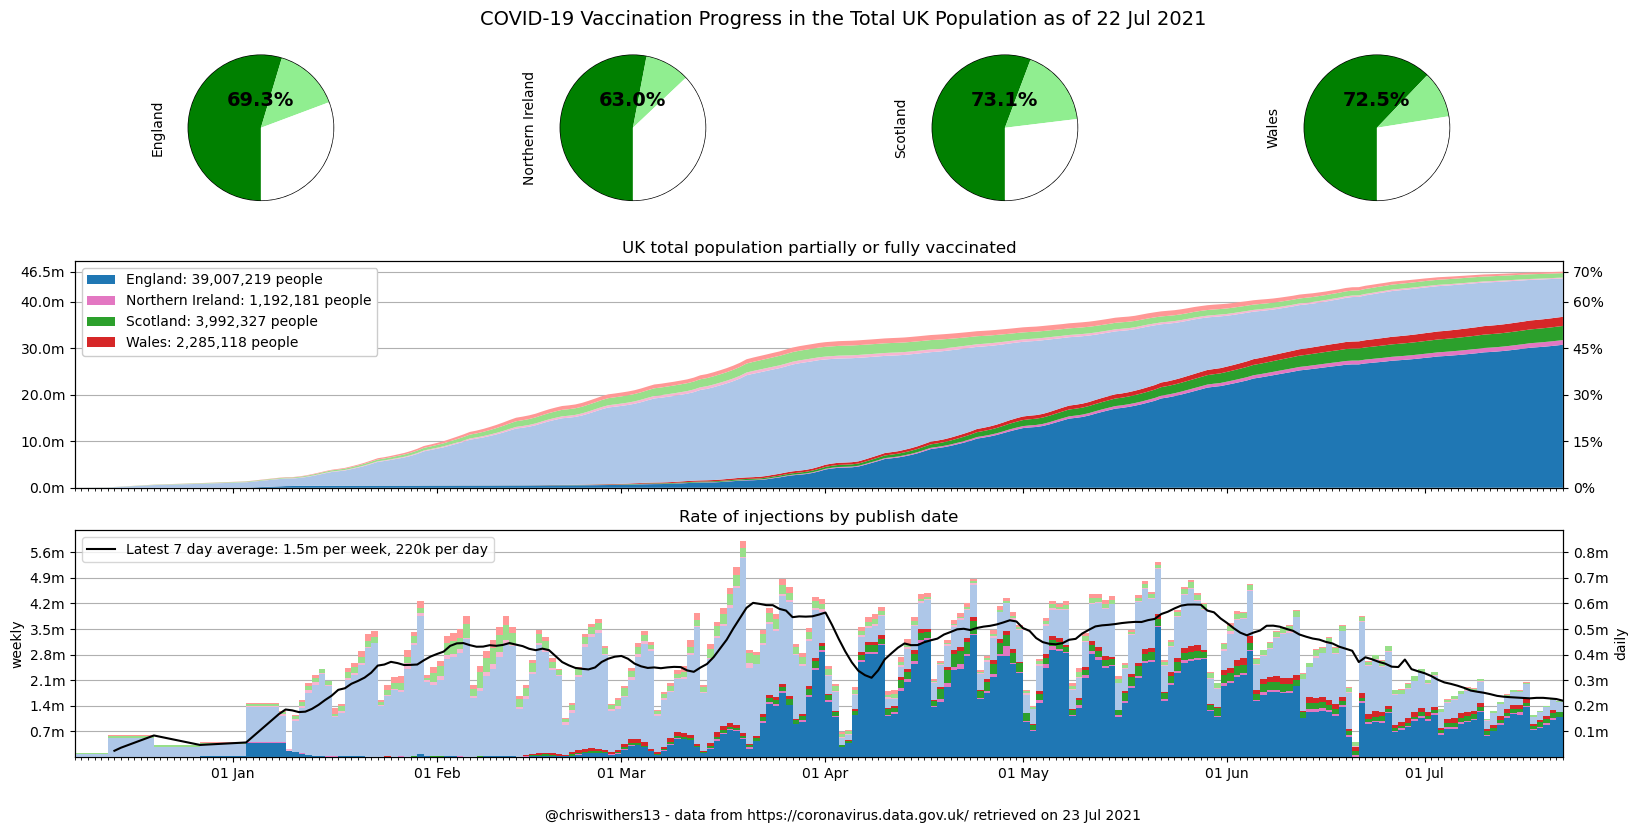

In [8]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

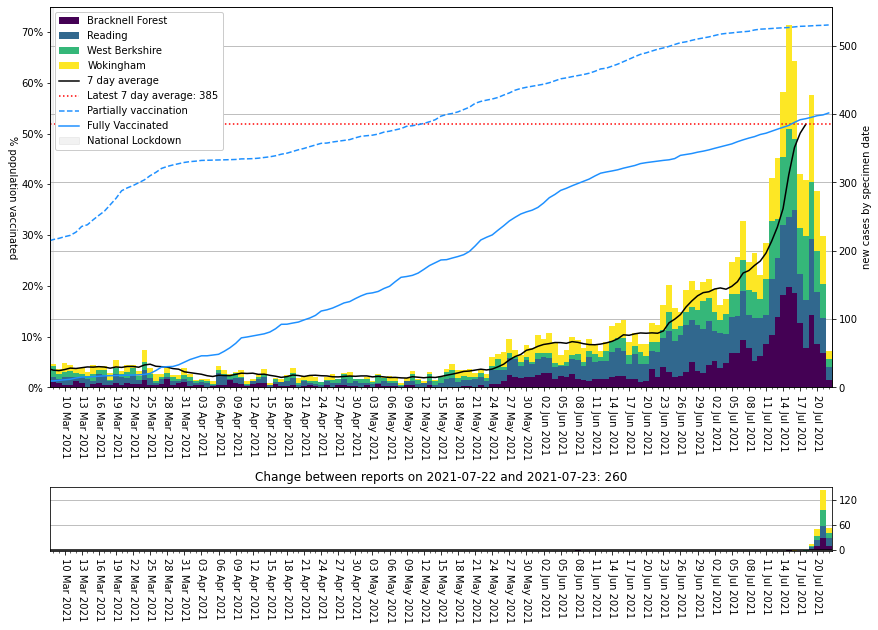

In [9]:
plot_areas(for_date, areas=my_areas, earliest=lockdown3[1], lines=population_vaccinated)

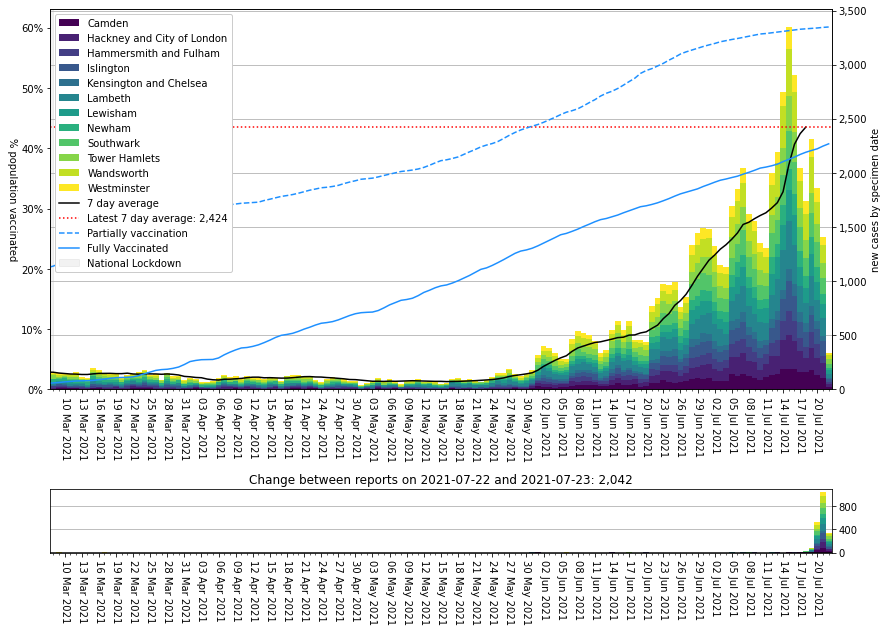

In [10]:
plot_areas(for_date, areas=london_areas, earliest=lockdown3[1], lines=population_vaccinated)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E06000003,Redcar and Cleveland,1025.884069,1407.0,2021-07-22
E06000002,Middlesbrough,959.710597,1353.0,2021-07-22
E06000004,Stockton-on-Tees,865.476215,1708.0,2021-07-22
N09000003,Belfast,814.747542,2799.0,2021-07-22
E06000001,Hartlepool,780.457598,731.0,2021-07-22
E07000029,Copeland,739.187187,504.0,2021-07-22
E08000023,South Tyneside,720.644341,1088.0,2021-07-22
E08000024,Sunderland,699.663312,1943.0,2021-07-22
E06000012,North East Lincolnshire,695.649994,1110.0,2021-07-22


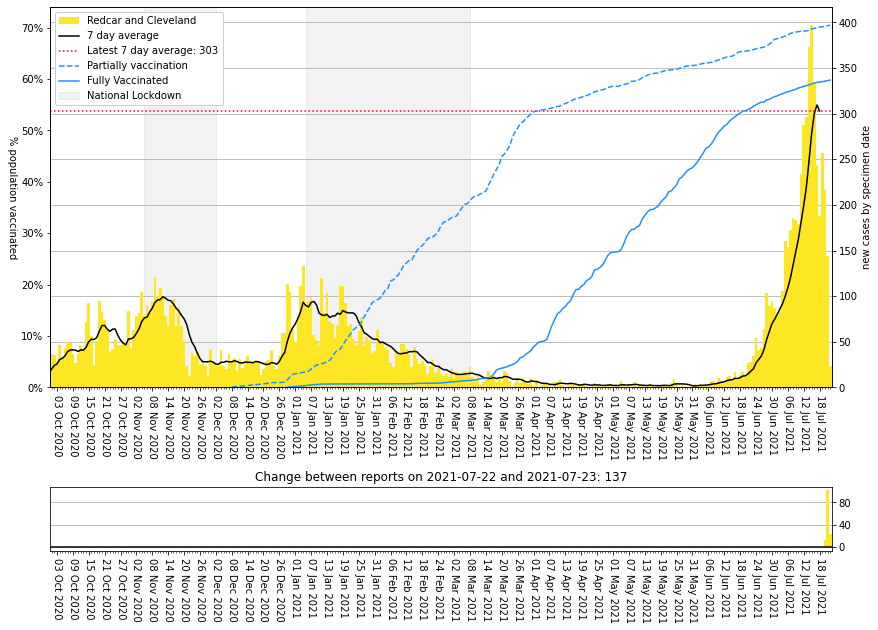

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=population_vaccinated)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,395.159991,4512.0,2021-07-22
E08000035,Leeds,471.039755,3736.0,2021-07-22
E06000047,County Durham,549.713824,2914.0,2021-07-22
N09000003,Belfast,814.747542,2799.0,2021-07-22
E06000023,"Bristol, City of",603.612178,2797.0,2021-07-22
E08000032,Bradford,496.872777,2682.0,2021-07-22
E08000019,Sheffield,425.918992,2491.0,2021-07-22
E08000003,Manchester,423.616914,2342.0,2021-07-22
E08000017,Doncaster,649.267370,2025.0,2021-07-22


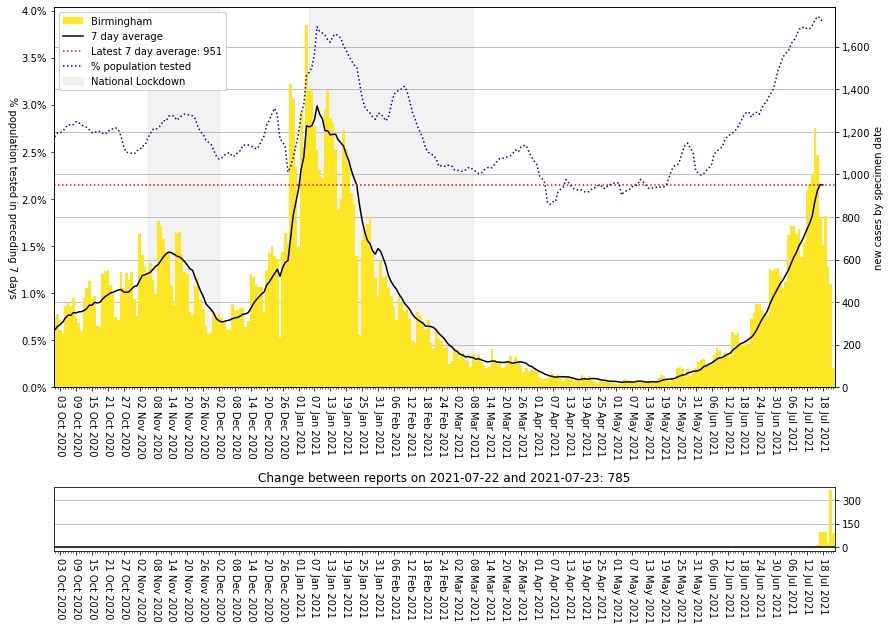

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 3.0
phe_max = 1.3

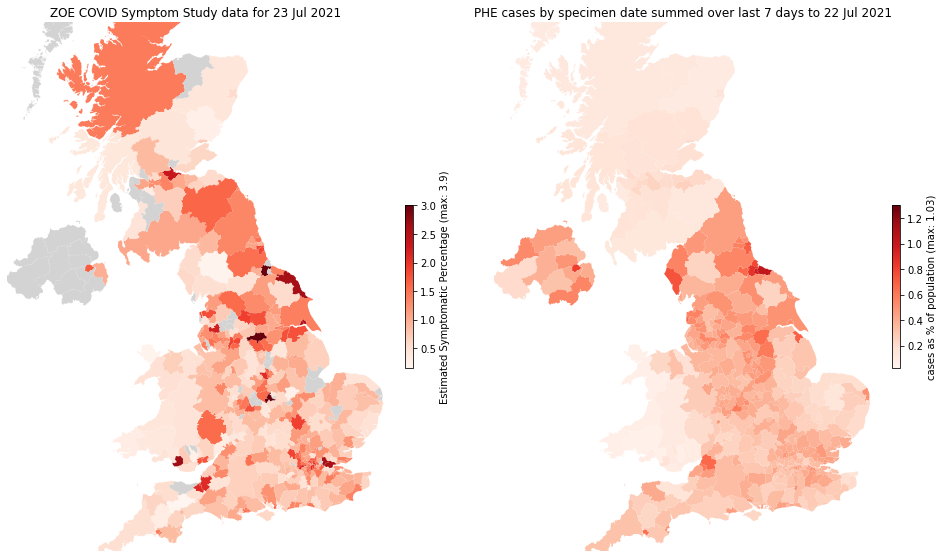

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...